In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
##
pd.set_option('display.max_columns', None)

# Разделение данных на обучающую и тестовую выборки

In [8]:
data = pd.read_csv('student-mat.csv')

#_#  
school — школа (GP или MS).  
gender — пол.  
age — возраст.  
address — тип местности (U — город или R — пригород).  
famsize — размер семьи (LE3 — «не больше 3 человек» или GT3 — «больше 3 человек»).  
Pstatus — семейный статус родителей (T — «живут вместе» или A — «живут раздельно»).  
Medu — образование матери (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).  
Fedu — образование отца.  
Mjob — работа матери (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяйка» или другое — «другое»).  
Fjob — работа отца.  
reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — «выбор предметов» или other — «другое»).  
guardian — попечитель ученика (mother — «мать», father — «отец» или other — «кто-то другой»).  
traveltime — время в пути от дома до школы (численный: 1 — «меньше 15 минут», 2 — «от 15 до 30 минут», 3 — «от 30 минут до 1 часа» или 4 — «больше 1 часа»).  
studytime — время на учёбу в неделю (численный: 1 — «меньше 2 часов», 2 — «от 2 до 5 часов», 3 — «от 5 до 10 часов» или 4 — «больше 10 часов»).  
failures — число незачётов по предмету в прошлом (численный: от 0 до 3).  
schoolsup — дополнительная образовательная поддержка (бинарный: yes — да или no — нет).  
famsup — дополнительная семейная поддержка (бинарный: yes — да или no — нет).  
paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).  
activities — внеучебная деятельность (бинарный: yes — да или no — нет).  
nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).  
higher — планирует получать высшее образование (бинарный: yes — да или no — нет).  
internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).  
romantic — есть вторая половинка (бинарный: yes — да или no — нет).  
famrel — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).  
freetime — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).  
goout — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).  
health — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).  
absences — число пропусков занятий (численный: от 0 до 93).  
G1 — оценка за первый учебный период (численный: от 0 до 20).  

G3 — итоговая оценка (численный: от 0 до 20). Предсказываемая характеристика

In [21]:
##
data.sample(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
88,GP,M,16,U,GT3,T,2,2,services,other,reputation,father,2,2,1,no,no,yes,yes,no,yes,yes,no,4,4,2,3,12,11,10
323,GP,F,17,U,GT3,T,3,1,services,services,course,father,1,3,0,no,yes,no,no,no,yes,yes,no,3,4,3,5,1,12,15
52,GP,M,15,U,LE3,A,4,2,health,health,other,father,2,1,1,no,no,no,no,yes,yes,no,no,5,5,5,5,6,11,10
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,5,5,4,8,18,18
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,4,6,18,19
239,GP,M,18,U,GT3,T,2,2,other,services,reputation,father,1,2,1,no,no,no,no,yes,no,yes,no,5,5,4,2,0,7,0
350,MS,M,19,R,GT3,T,1,1,other,services,home,other,3,2,3,no,no,no,no,yes,yes,yes,no,5,4,4,2,8,8,8
344,GP,F,18,U,GT3,T,2,3,at_home,other,course,mother,1,3,0,no,yes,no,no,yes,yes,yes,no,4,3,3,3,4,11,10
146,GP,F,15,U,GT3,T,3,2,health,services,home,father,1,2,3,no,yes,no,no,yes,yes,yes,no,3,3,2,3,0,6,0
314,GP,F,19,U,GT3,T,1,1,at_home,health,home,other,1,3,2,no,no,no,no,no,yes,yes,yes,4,1,2,3,14,15,13


In [23]:
##
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [28]:
##
data.isnull().any().sum()

0

In [29]:
##
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,20.000000


In [30]:
##
data.describe(include='object')

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


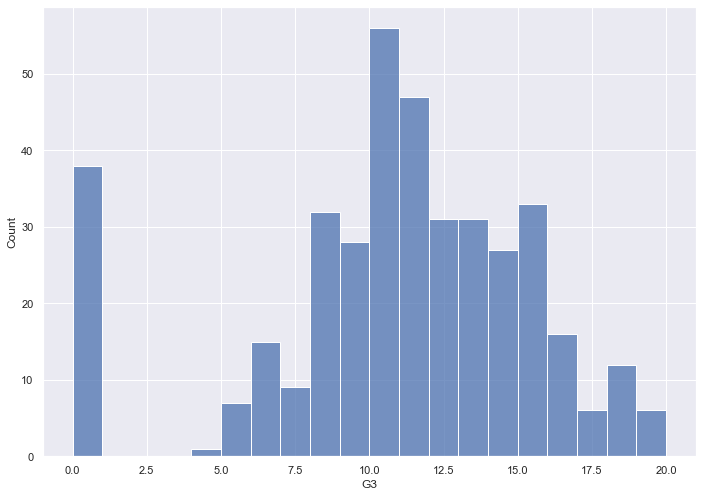

In [20]:
sns.histplot(data['G3'], bins=20);

In [33]:
##
data.shape[0]

395

In [9]:
data = data[data['G3'] != 0]

In [35]:
##
data.shape[0]

357

In [36]:
##
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,3.549020,6.316527,11.268908,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,1.402638,8.187623,3.240450,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,2.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,20.000000


In [37]:
##
data.describe(include='object')

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,315,185,279,250,318,127,196,126,248,307,219,184,180,286,343,299,245


In [10]:
X = data.drop(columns=['G3'])
y = data['G3']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [12]:
len(X_train)

307

In [13]:
len(X_test)

50

# Исследовательский анализ данных

In [14]:
X_y_train = X_train.copy(deep=True)

In [15]:
X_y_train['y'] = y_train

In [16]:
X_y_train.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.143667,-0.152028,0.124947,-0.012044,0.265867,0.105719,0.018381,0.127471,-0.066960,0.232719,-0.058061,-0.163554
Medu,-0.143667,1.000000,0.622469,-0.189125,0.059405,-0.217911,-0.005481,-0.021037,0.080858,-0.030022,0.052977,0.180870,0.205427
Fedu,-0.152028,0.622469,1.000000,-0.194381,-0.031392,-0.265805,-0.031753,-0.054498,0.029325,-0.007715,-0.015996,0.160996,0.150231
traveltime,0.124947,-0.189125,-0.194381,1.000000,-0.105084,0.131414,-0.002823,-0.007708,0.062239,0.016959,0.028547,-0.119743,-0.131757
studytime,-0.012044,0.059405,-0.031392,-0.105084,1.000000,-0.136720,0.063829,-0.132218,-0.018720,-0.087165,-0.098216,0.156326,0.158553
failures,0.265867,-0.217911,-0.265805,0.131414,-0.136720,1.000000,-0.020901,0.133293,0.195804,0.042964,0.161519,-0.326272,-0.311091
famrel,0.105719,-0.005481,-0.031753,-0.002823,0.063829,-0.020901,1.000000,0.183048,0.068130,0.140506,-0.073748,0.052678,0.075401
freetime,0.018381,-0.021037,-0.054498,-0.007708,-0.132218,0.133293,0.183048,1.000000,0.255339,0.086641,-0.074686,-0.023542,-0.051553
goout,0.127471,0.080858,0.029325,0.062239,-0.018720,0.195804,0.068130,0.255339,1.000000,-0.061314,0.057467,-0.170340,-0.196119
health,-0.066960,-0.030022,-0.007715,0.016959,-0.087165,0.042964,0.140506,0.086641,-0.061314,1.000000,-0.057903,-0.074392,-0.071237


In [17]:
corr = X_y_train.corr()['y']

In [18]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [19]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

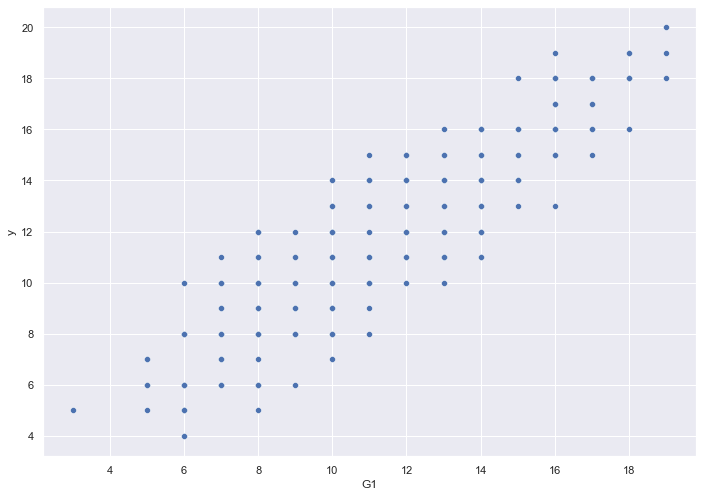

In [20]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y']);

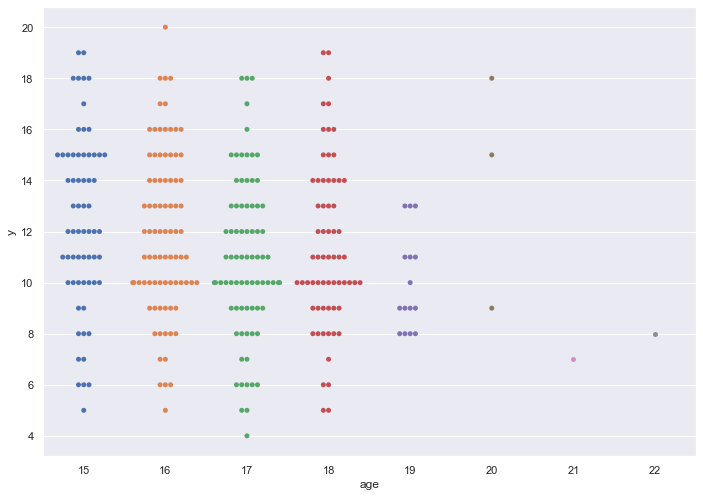

In [21]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y']);

In [22]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

In [23]:
categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [60]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

,higher,y
0,no,9.833333
1,yes,11.657627


In [61]:
## проделав код выше для всех категориальных факторов выделили "интересные":
## в группах есть отличие по успеваемости

In [62]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

# Подготовка факторов

In [32]:
!pip install category_encoders

In [33]:
from category_encoders.target_encoder import TargetEncoder

In [34]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [35]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [36]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,4,3,5,4,14,11,13.583333,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,home,mother,1,3,0,no,yes,no,yes,no,yes,yes,no,5,3,2,5,0,13,14,11.744681,11.476190,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,home,father,3,1,0,no,yes,yes,yes,yes,yes,yes,no,3,3,4,3,8,9,10,11.744681,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,course,father,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,5,2,1,4,11,11,10.962963,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6,6,6,10.962963,13.565217,9.871795,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,reputation,mother,2,2,0,no,no,no,no,yes,yes,no,yes,1,2,3,5,2,12,11,12.253012,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,reputation,other,1,4,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,3,10,8,8,10.962963,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,home,father,2,1,0,no,no,no,yes,yes,yes,yes,no,5,4,2,5,0,13,13,10.962963,11.476190,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,2,4,19,20,13.583333,11.476190,11.835821,11.657627


In [37]:
factors_to_use = numeric_factors_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [38]:
X_train_encoded = X_y_train.copy(deep=True)

In [39]:
X_train_encoded = X_train_encoded[factors_to_use]

In [63]:
## оставляем только числовые столбики для обучения
X_train_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,13.583333,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.744681,11.476190,11.835821,11.657627
197,16,3,9,1,3,3,0,11.744681,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.962963,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.962963,13.565217,9.871795,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,17,2,12,2,3,2,0,12.253012,11.339181,11.835821,11.657627
210,19,1,8,4,3,3,0,10.962963,11.339181,11.835821,11.657627
117,16,2,13,1,3,3,0,10.962963,11.476190,11.835821,11.657627
47,16,1,19,4,4,3,0,13.583333,11.476190,11.835821,11.657627


In [108]:
X_train_encoded.head(6)

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,13.583333,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.744681,11.476190,11.835821,11.657627
197,16,3,9,1,3,3,0,11.744681,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.962963,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.962963,13.565217,9.871795,11.657627
64,15,1,10,2,4,3,0,12.253012,11.476190,9.871795,11.657627


In [64]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

In [65]:
X_train_scaled = scaler.transform(X_train_encoded)

In [66]:
y_train

295    11
224    14
197    10
231    11
7       6
       ..
357    11
210     8
117    13
47     20
190    13
Name: G3, Length: 307, dtype: int64

# Создание модели

In [113]:
model = LinearRegression()

In [116]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [117]:
model.score(X_train_scaled, y_train)

0.8207404362525064

# Оценка качества

In [118]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [119]:
X_test_encoded = X_test[factors_to_use]

In [121]:
X_test_scaled = scaler.transform(X_test_encoded)

In [123]:
model.score(X_test_scaled, y_test)

0.726363892547719

In [124]:
model.predict(X_test_scaled)

array([12.29556389, 11.13496186,  9.23502848, 12.50097855,  7.97202549,
        7.59548334, 10.52671051, 10.9914081 , 14.97466503, 15.3202819 ,
       12.50924805, 12.59191577, 14.24416646, 14.12688969,  9.09937801,
       11.08069627, 13.93153623, 14.04537752, 15.95809453, 12.20905772,
        6.67143378, 15.68982302,  8.98434064, 10.83619766,  7.99038311,
       12.94937609, 12.39051731,  8.63914491, 14.39092562,  7.84456622,
        7.65705823,  7.90274697, 12.26958421,  8.8951469 , 10.73672969,
       14.07200969, 12.02055174,  7.93833316, 11.67261083, 18.09847844,
       13.6815412 , 12.86782138, 15.24938209,  9.29402072,  6.97921845,
       13.65775549,  8.19458716,  9.33473482, 11.23007644, 13.36659552])

In [125]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)
    
    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))
        
    mae = sum(errs) / len(errs)
    
    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)
    
    return mae, r2

In [126]:
score_model(model, X_test_scaled, y_test)

(1.294071521955721, 0.726363892547719)

In [135]:
maes = []
r2s = []

X_y_test = X_test_encoded.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)
    
    X_test_sample = X_y_sample.drop(columns=['y'])
    X_test_sample = scaler.transform(X_test_sample)
    y_test_sample = X_y_sample['y']
    
    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)
    
    maes.append(mae_sample)
    r2s.append(r2_sample)

In [136]:
maes = list(sorted(maes))

In [138]:
maes = maes[25:975]

In [139]:
maes[0], maes[-1]

(1.0353745408510524, 1.519218999378254)

<AxesSubplot: ylabel='Count'>

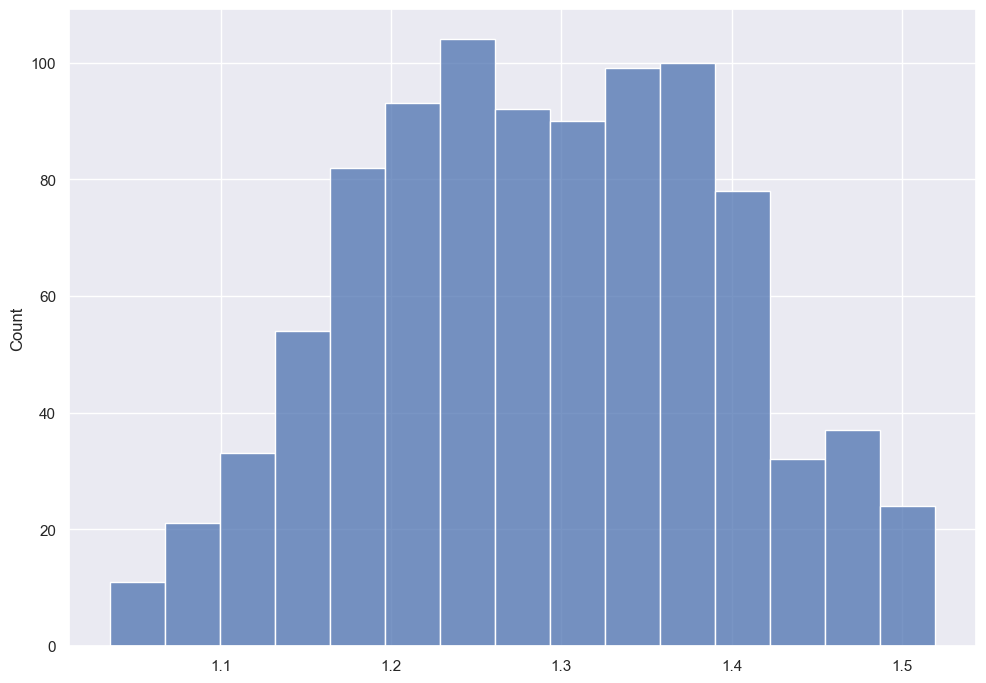

In [140]:
sns.histplot(maes)

# Интерпретация модели

In [150]:
model.coef_

array([-2.07081845, -0.09387195, 14.04355785,  0.24644115,  0.37359536,
       -0.44188986,  0.05824508,  0.51553489,  0.0292249 ,  0.17249021,
       -0.26751205])

In [153]:
for x, y in zip(X_train_encoded.columns, model.coef_):
    print(x, round(y, 2))

age -2.07
traveltime -0.09
G1 14.04
studytime 0.25
Medu 0.37
Fedu -0.44
failures 0.06
Mjob_encoded 0.52
Fjob_encoded 0.03
schoolsup_encoded 0.17
higher_encoded -0.27


In [154]:
X_y_train.groupby('age').agg({'y': 'mean'})

,y
age,
15,12.412698
16,11.963855
17,10.961039
18,11.421875
19,10.000000
20,14.000000
21,7.000000
22,8.000000


<AxesSubplot: xlabel='age', ylabel='y'>

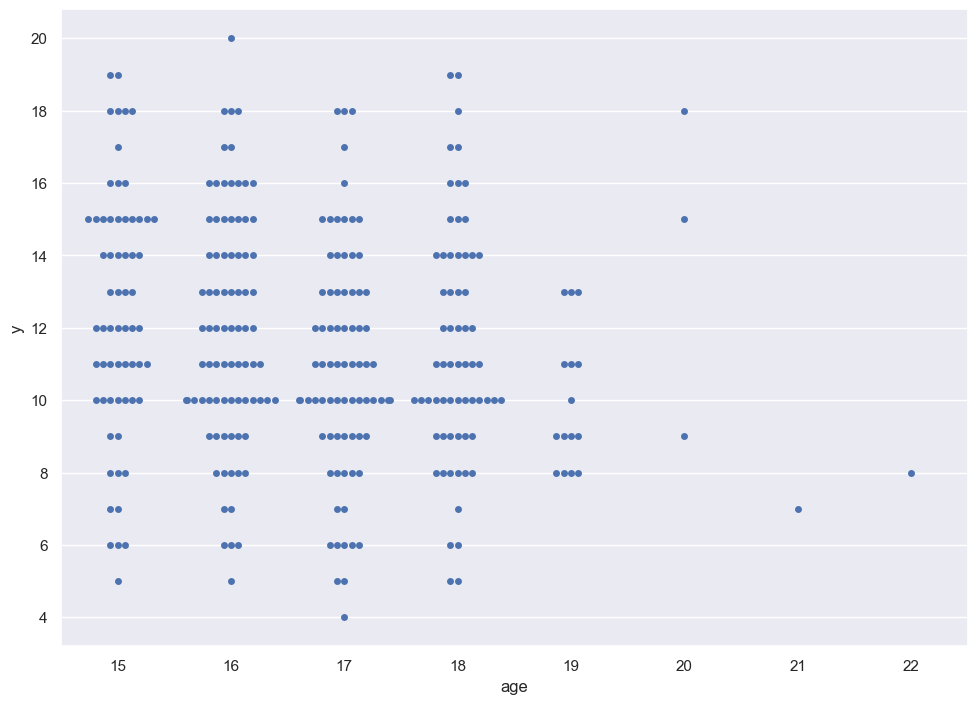

In [155]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])